# Neural Networks
## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

## Import Dataset

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis

In [4]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:xlabel='Geography', ylabel='Age'>

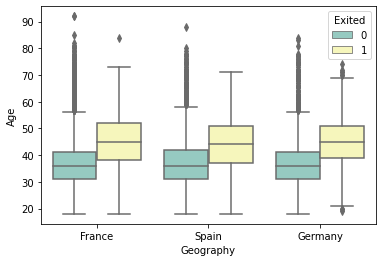

In [6]:
sns.boxplot(x="Geography", y ='Age', hue="Exited", data=dataset, palette="Set3")

<AxesSubplot:xlabel='Exited', ylabel='count'>

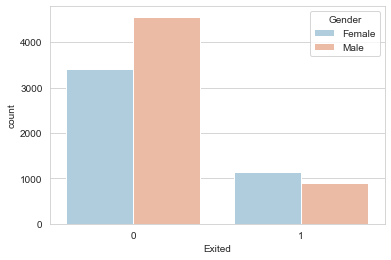

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Exited', hue="Gender", data=dataset,palette='RdBu_r')

## Data Preprocessing
### Data Encoding

In [8]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

## Split Data into Test and Train Data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training Data on the Decision Tree Classifier

In [13]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
235/235 [==============================] - 0s 534us/step - loss: 0.5636 - accuracy: 0.7840
Epoch 2/100
235/235 [==============================] - 0s 465us/step - loss: 0.4940 - accuracy: 0.7960
Epoch 3/100
235/235 [==============================] - 0s 549us/step - loss: 0.4625 - accuracy: 0.7985
Epoch 4/100
235/235 [==============================] - 0s 472us/step - loss: 0.4462 - accuracy: 0.8043
Epoch 5/100
235/235 [==============================] - 0s 518us/step - loss: 0.4382 - accuracy: 0.8061
Epoch 6/100
235/235 [==============================] - 0s 549us/step - loss: 0.4335 - accuracy: 0.8068
Epoch 7/100
235/235 [==============================] - 0s 473us/step - loss: 0.4293 - accuracy: 0.8085
Epoch 8/100
235/235 [==============================] - 0s 497us/step - loss: 0.4260 - accuracy: 0.8105
Epoch 9/100
235/235 [==============================] - 0s 471us/step - loss: 0.4222 - accuracy: 0.8145
Epoch 10/100
235/235 [==============================] - 0s 485us/step - l

235/235 [==============================] - 0s 488us/step - loss: 0.3353 - accuracy: 0.8596
Epoch 80/100
235/235 [==============================] - 0s 476us/step - loss: 0.3360 - accuracy: 0.8599
Epoch 81/100
235/235 [==============================] - 0s 478us/step - loss: 0.3355 - accuracy: 0.8608
Epoch 82/100
235/235 [==============================] - 0s 471us/step - loss: 0.3355 - accuracy: 0.8613
Epoch 83/100
235/235 [==============================] - 0s 508us/step - loss: 0.3353 - accuracy: 0.8608
Epoch 84/100
235/235 [==============================] - 0s 486us/step - loss: 0.3351 - accuracy: 0.8593
Epoch 85/100
235/235 [==============================] - 0s 470us/step - loss: 0.3351 - accuracy: 0.8597
Epoch 86/100
235/235 [==============================] - 0s 480us/step - loss: 0.3355 - accuracy: 0.8603
Epoch 87/100
235/235 [==============================] - 0s 498us/step - loss: 0.3350 - accuracy: 0.8609
Epoch 88/100
235/235 [==============================] - 0s 469us/step - loss:

## Predictions and Evaluations

In [14]:
predictions = ann.predict(X_test)
predictions = (predictions > 0.5)

NameError: name 'y_pred' is not defined

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy_score(y_test, predictions)